In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns





In [2]:
df = pd.read_csv('Feo_analysis_data.csv')
df.set_index('Date',drop=True, inplace=True)

In [3]:
df.head()

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3-h),Water_Mix2(m3-h),Water_Mixer_Total,Killn_Speed(rpm),TG_Zone1_Temp(deg),...,730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t-h),WF6(t-h),Wf5&6_total,Grate_Speed(rpm),FeO,P_9-16_mm,Pellet_Feo
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-22,1664.166667,1944.333333,9.068056,4.198194,34.56,3.77,2.85,6.62,1.72,215.62,...,32.50,12383.61,827.97,14.54,19.03,33.57,6.20,0.721667,86.938333,Very Good
2019-03-23,1664.307692,2014.000000,8.997183,4.894366,34.01,5.68,2.77,8.45,1.72,218.05,...,31.96,12413.71,847.22,17.42,16.49,33.91,5.98,0.786667,87.138333,Very Good
2019-03-24,1640.000000,2036.909091,8.795833,4.649583,28.01,5.07,3.07,8.14,1.72,227.96,...,31.49,12277.02,844.50,17.58,18.08,35.66,5.98,0.660000,86.723333,Very Good
2019-03-26,1640.090909,2034.181818,9.001493,5.343582,34.39,4.49,4.48,8.97,1.72,223.18,...,32.16,12960.56,805.14,17.68,17.76,35.44,6.13,0.853333,88.649167,Good
2019-03-28,1593.916667,1998.500000,8.850000,4.608088,38.36,3.44,3.23,6.67,1.72,232.53,...,31.87,12608.12,844.28,18.81,17.56,36.37,5.77,0.750833,87.730833,Very Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 2019-03-22 to 2022-02-11
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Blane_before_hpgr   631 non-null    float64
 1   Blane_after_hpgr    631 non-null    float64
 2   MC%                 631 non-null    float64
 3   Drop                631 non-null    float64
 4   710FN3_Damper(%)    631 non-null    float64
 5   Water_Mix1(m3-h)    631 non-null    float64
 6   Water_Mix2(m3-h)    631 non-null    float64
 7   Water_Mixer_Total   631 non-null    float64
 8   Killn_Speed(rpm)    631 non-null    float64
 9   TG_Zone1_Temp(deg)  631 non-null    float64
 10  710FN1_Damper(%)    631 non-null    float64
 11  730FN1_Damper(%)    631 non-null    float64
 12  Grate_Feed(ton)     631 non-null    float64
 13  OffGas(deg)         631 non-null    float64
 14  WF5(t-h)            631 non-null    float64
 15  WF6(t-h)            631 non-null    float64
 1

In [5]:
data = df['Pellet_Feo'].value_counts()
data

Very Good    297
Good         263
Bad           71
Name: Pellet_Feo, dtype: int64

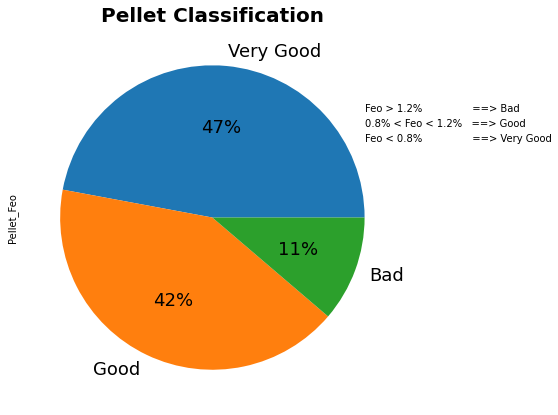

In [6]:
plt.figure(figsize=(10,7))
plt.title('Pellet Classification', fontsize=20,fontweight='bold')
plt.text(1,0.5,'Feo < 0.8%                ==> Very Good')
plt.text(1,0.6,'0.8% < Feo < 1.2%   ==> Good')
plt.text(1,0.7,'Feo > 1.2%                ==> Bad')
data.plot.pie(autopct = '%0.0f%%', textprops={'fontsize': 18})
plt.show()

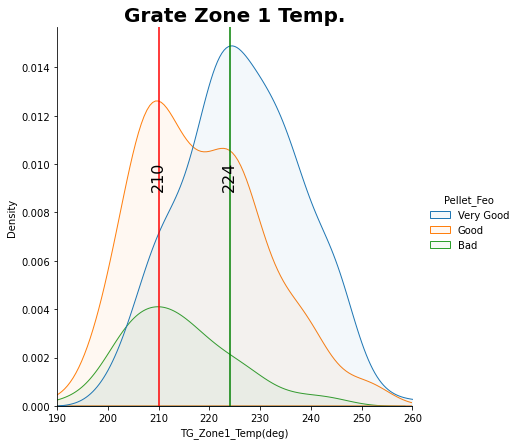

In [7]:


sns.displot(
    data=df,
    x="TG_Zone1_Temp(deg)",
    hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.05,
)
plt.title('Grate Zone 1 Temp.', fontsize=20,fontweight='bold')
plt.xlim(190,260)
plt.axvline(224, c='green')
plt.axvline(210, c='red')
plt.annotate('210', xy =(210, 0.009),rotation = 90,ha='center', fontsize=16) 
plt.annotate('224', xy =(224, 0.009),rotation = 90,ha='center', fontsize=16) 
plt.show()

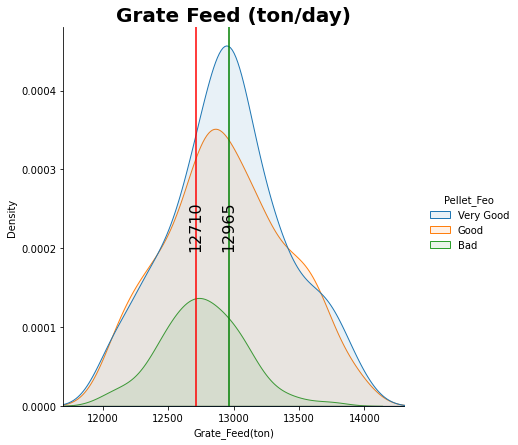

In [8]:
sns.displot(
    data=df,
    x="Grate_Feed(ton)", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.title('Grate Feed (ton/day)', fontsize=20,fontweight='bold')
plt.xlim(11700,14300)
plt.axvline(12965, c='green')
plt.axvline(12710, c='red')
plt.annotate('12965', xy =(12965, 0.0002),rotation = 90,ha='center', fontsize=16) 
plt.annotate('12710', xy =(12710, 0.0002),rotation = 90,ha='center', fontsize=16) 
plt.show()

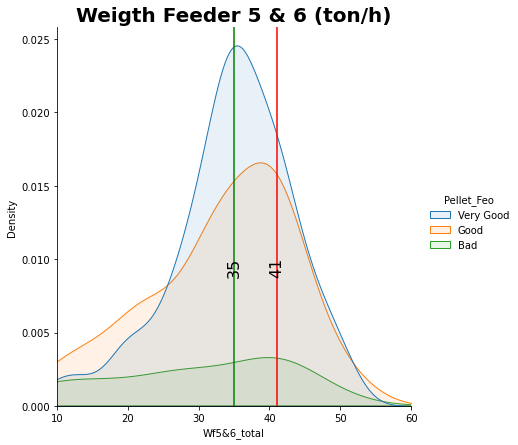

In [9]:
sns.displot(
    data=df,
    x="Wf5&6_total", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.title('Weigth Feeder 5 & 6 (ton/h)', fontsize=20,fontweight='bold')
plt.xlim(10,60)
plt.axvline(35, c='green')
plt.axvline(41, c='red')
plt.annotate('35', xy =(35, 0.009),rotation = 90,ha='center', fontsize=16) 
plt.annotate('41', xy =(41, 0.009),rotation = 90,ha='center', fontsize=16) 
plt.show()

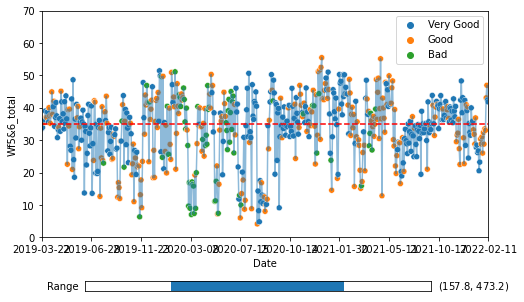

In [10]:
from matplotlib.widgets import RangeSlider

#%matplotlib notebook



fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), sharex=True)
fig.subplots_adjust(bottom=0.25)

# Create the RangeSlider
slider_ax = fig.add_axes([0.20, 0.1, 0.60, 0.03])
slider = RangeSlider(slider_ax, "Range", 0, df.shape[0])

sns.lineplot(x='Date', y='Wf5&6_total', data=df,ax=axe,alpha=0.5 )
sns.scatterplot(x='Date', y='Wf5&6_total', data=df ,ax=axe,hue="Pellet_Feo",)





limit_line = axe.axhline(35, c='red',ls='--')
axe.set_xlim(slider.val[0],slider.val[1])
axe.set_xticks(axe.get_xticks()[::70])
axe.set_ylim(0,70)
axe.legend(loc='upper right')


def update(val):
    axe.set_xlim(val[0],val[1])
    fig.canvas.draw_idle()


    
slider.on_changed(update)
plt.show()


In [11]:
df.shape

(631, 21)

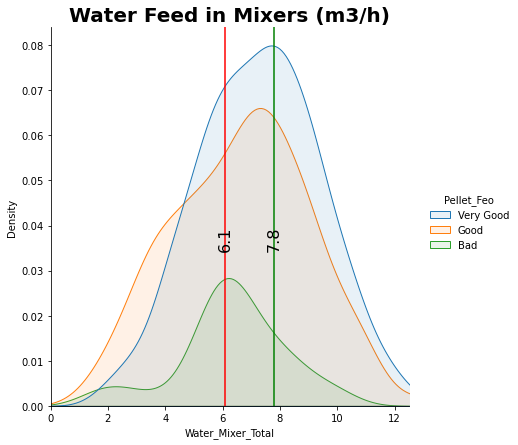

In [12]:
sns.displot(
    data=df,
    x="Water_Mixer_Total", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.title('Water Feed in Mixers (m3/h)', fontsize=20,fontweight='bold')
plt.xlim(0,12.5)
plt.axvline(7.8, c='green')
plt.axvline(6.1, c='red')
plt.annotate('7.8', xy =(7.8, 0.035),rotation = 90,ha='center', fontsize=16) 
plt.annotate('6.1', xy =(6.1, 0.035),rotation = 90,ha='center', fontsize=16) 
plt.show()

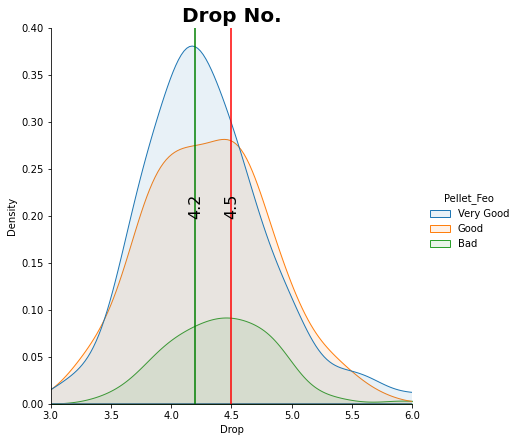

In [13]:
sns.displot(
    data=df,
    x="Drop", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.title('Drop No.', fontsize=20,fontweight='bold')
plt.xlim(3,6)
plt.axvline(4.2, c='green')
plt.axvline(4.5, c='red')
plt.annotate('4.2', xy =(4.2, 0.2),rotation = 90,ha='center', fontsize=16) 
plt.annotate('4.5', xy =(4.5, 0.2),rotation = 90,ha='center', fontsize=16) 
plt.show()

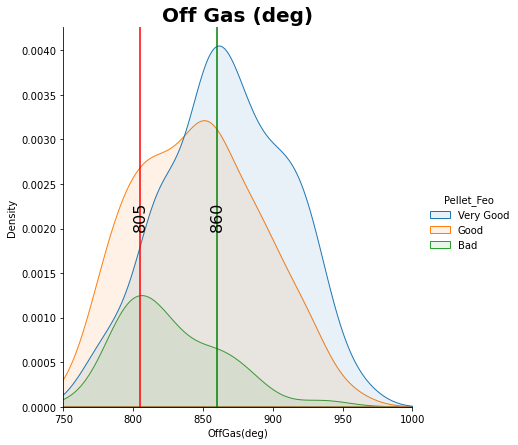

In [14]:
sns.displot(
    data=df,
    x="OffGas(deg)", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.title('Off Gas (deg)', fontsize=20,fontweight='bold')
plt.xlim(750,1000)
plt.axvline(860, c='green')
plt.axvline(805, c='red')
plt.annotate('860', xy =(860, 0.002),rotation = 90,ha='center', fontsize=16) 
plt.annotate('805', xy =(805, 0.002),rotation = 90,ha='center', fontsize=16) 
plt.show()

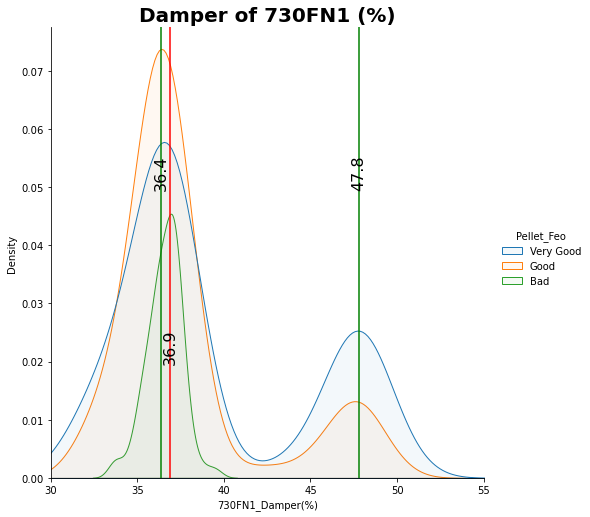

In [15]:
sns.displot(
    data=df,
    x="730FN1_Damper(%)",
    hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=7,
    fill=True,
    alpha = 0.05,
)
plt.title('Damper of 730FN1 (%)', fontsize=20,fontweight='bold')
plt.xlim(30,55)
plt.axvline(36.4, c='green')
plt.axvline(47.8, c='green')
plt.axvline(36.9, c='red')
plt.annotate('36.4', xy =(36.4, 0.05),rotation = 90,ha='center', fontsize=16) 
plt.annotate('47.8', xy =(47.8, 0.05),rotation = 90,ha='center', fontsize=16)
plt.annotate('36.9', xy =(36.9, 0.02),rotation = 90,ha='center', fontsize=16) 
plt.show()

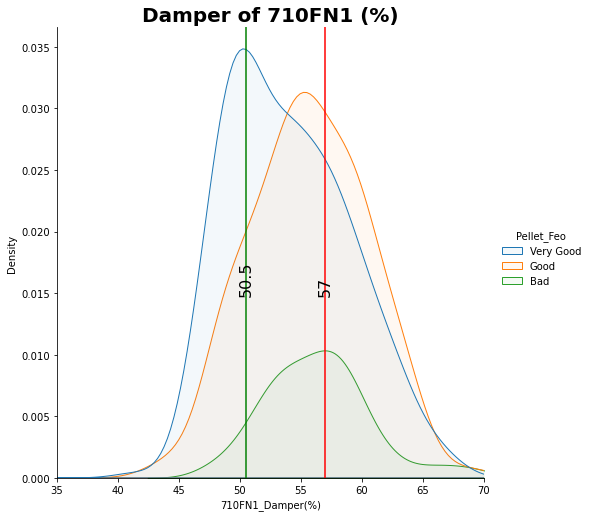

In [16]:
sns.displot(
    data=df,
    x="710FN1_Damper(%)",
    hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=7,
    fill=True,
    alpha = 0.05,
)
plt.title('Damper of 710FN1 (%)', fontsize=20,fontweight='bold')
plt.xlim(35,70)
plt.axvline(50.5, c='green')
plt.axvline(57, c='red')
plt.annotate('50.5', xy =(50.5, 0.015),rotation = 90,ha='center', fontsize=16) 
plt.annotate('57', xy =(57, 0.015),rotation = 90,ha='center', fontsize=16) 
plt.show()

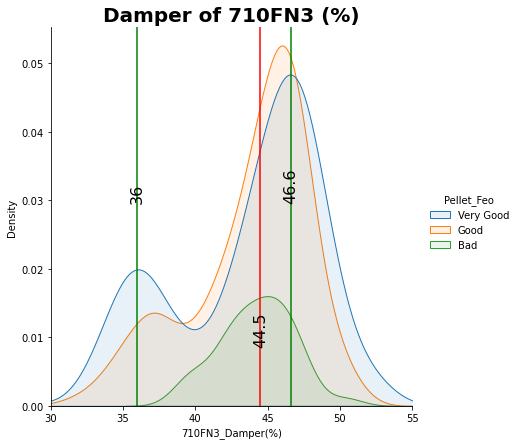

In [17]:
sns.displot(
    data=df,
    x="710FN3_Damper(%)", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.title('Damper of 710FN3 (%)', fontsize=20,fontweight='bold')
plt.xlim(30,55)
plt.axvline(46.6, c='green')
plt.axvline(36, c='green')
plt.axvline(44.5, c='red')
plt.annotate('46.6', xy =(46.6, 0.03),rotation = 90,ha='center', fontsize=16) 
plt.annotate('36', xy =(36, 0.03),rotation = 90,ha='center', fontsize=16) 
plt.annotate('44.5', xy =(44.5, 0.009),rotation = 90,ha='center', fontsize=16) 
plt.show()

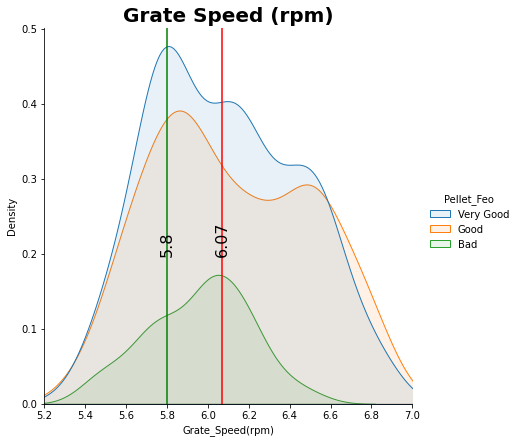

In [18]:
sns.displot(
    data=df,
    x="Grate_Speed(rpm)", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.title('Grate Speed (rpm)', fontsize=20,fontweight='bold')
plt.xlim(5.2,7)
plt.axvline(5.8, c='green')
plt.axvline(6.07, c='red')
plt.annotate('5.8', xy =(5.8, 0.2),rotation = 90,ha='center', fontsize=16) 
plt.annotate('6.07', xy =(6.07, 0.2),rotation = 90,ha='center', fontsize=16) 
plt.show()

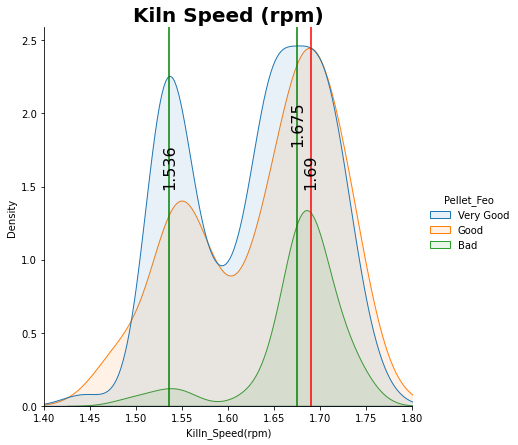

In [19]:
sns.displot(
    data=df,
    x="Killn_Speed(rpm)", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.title('Kiln Speed (rpm)', fontsize=20,fontweight='bold')
plt.xlim(1.4,1.8)
plt.axvline(1.536, c='green')
plt.axvline(1.675, c='green')
plt.axvline(1.69, c='red')
plt.annotate('1.536', xy =(1.536, 1.5),rotation = 90,ha='center', fontsize=16) 
plt.annotate('1.675', xy =(1.675, 1.8),rotation = 90,ha='center', fontsize=16) 
plt.annotate('1.69', xy =(1.69, 1.5),rotation = 90,ha='center', fontsize=16) 
plt.show()

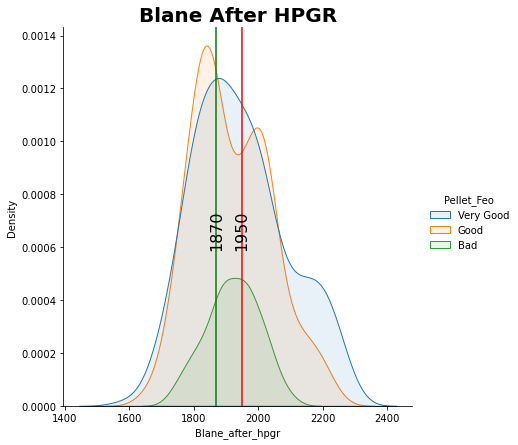

In [20]:
sns.displot(
    data=df,
    x="Blane_after_hpgr", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.title('Blane After HPGR', fontsize=20,fontweight='bold')
plt.axvline(1870, c='green')
plt.axvline(1950, c='red')
plt.annotate('1870', xy =(1870, 0.0006),rotation = 90,ha='center', fontsize=16) 
plt.annotate('1950', xy =(1950, 0.0006),rotation = 90,ha='center', fontsize=16) 
plt.show()